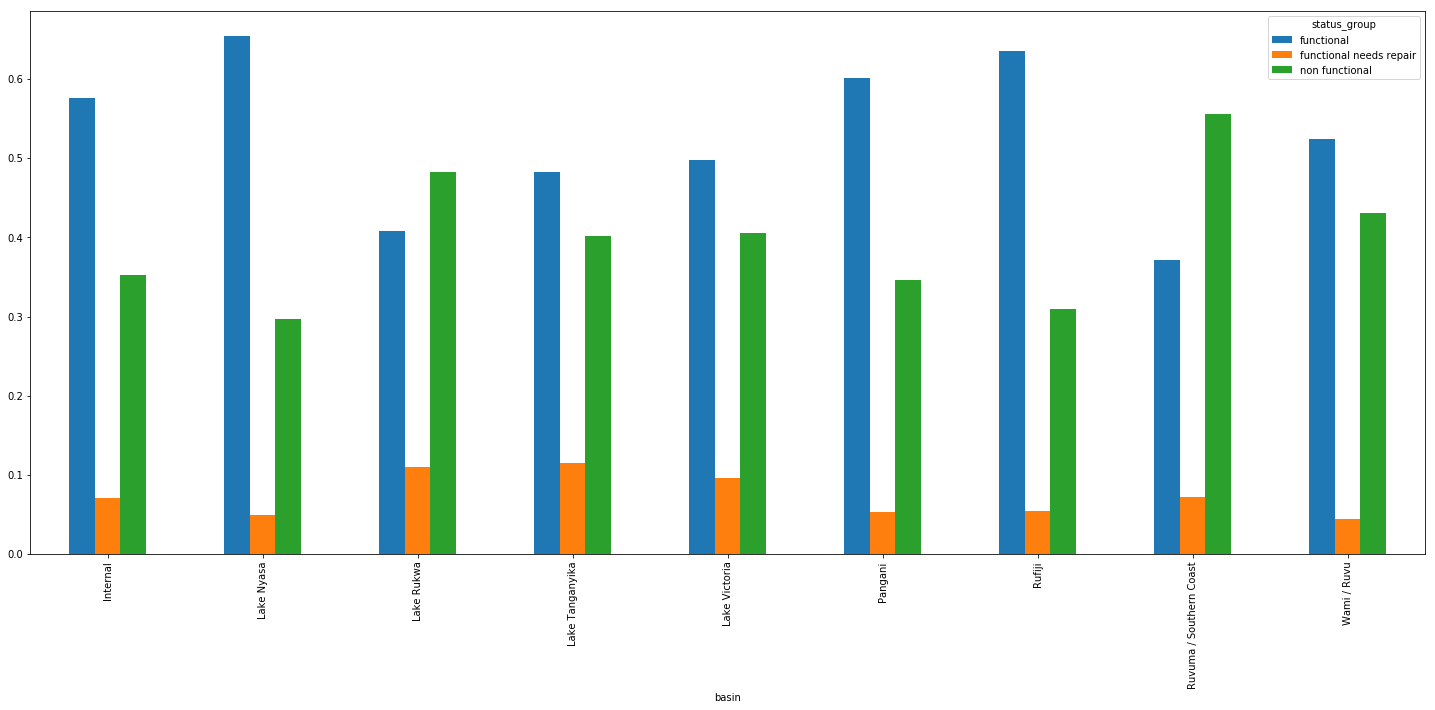

In [26]:
import pandas as pd
import numpy as np
import sys
%matplotlib inline
# Read data
data_values = pd.read_csv("../../../Datasets/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv")
data_labels = pd.read_csv("../../../Datasets/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv")

#Heights after preprocessing to get the missing height values
heights = pd.read_csv("../../../Datasets/heights.csv")

#Plot to check pumps functionality around different basins
pd.crosstab(data_values.basin, data_labels.status_group, normalize="index").plot.bar(figsize=(25,10));

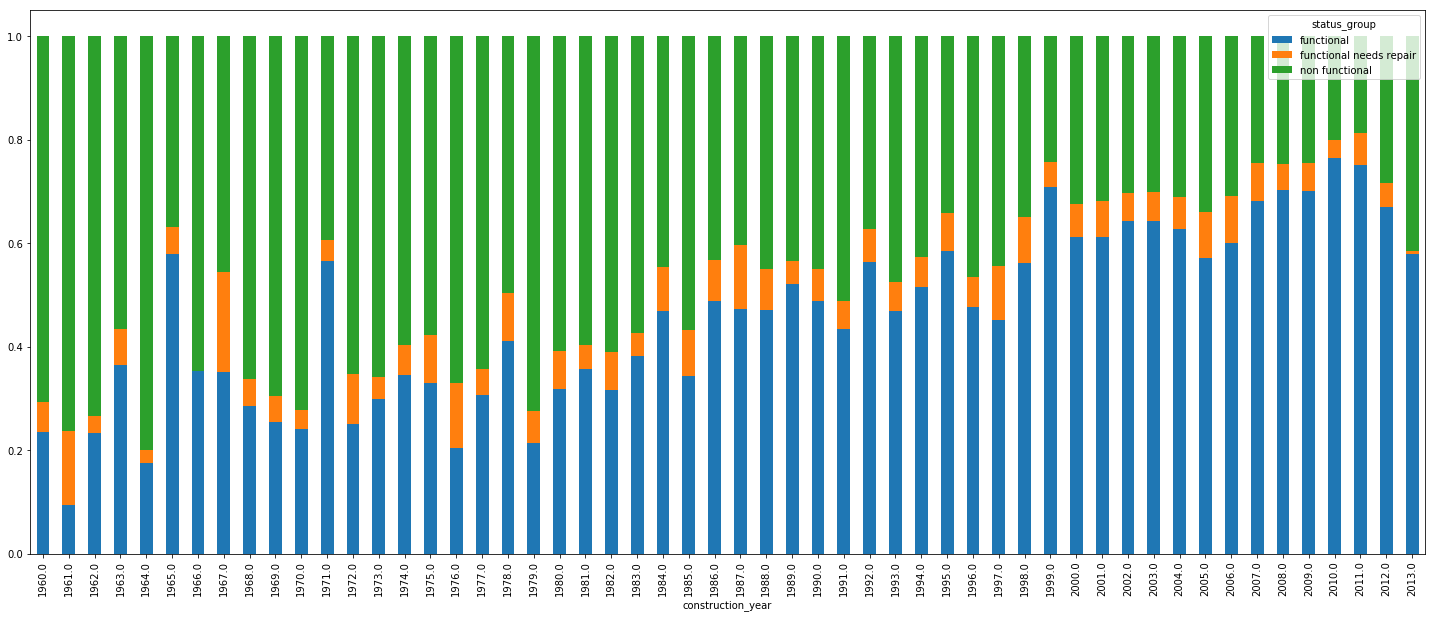

In [27]:
#Plot to check pumps functionality based on there construction year
pd.crosstab(data_values.construction_year[data_values.construction_year!=0],
            data_labels.status_group, normalize="index").plot.bar(stacked=True, figsize=(25,10));

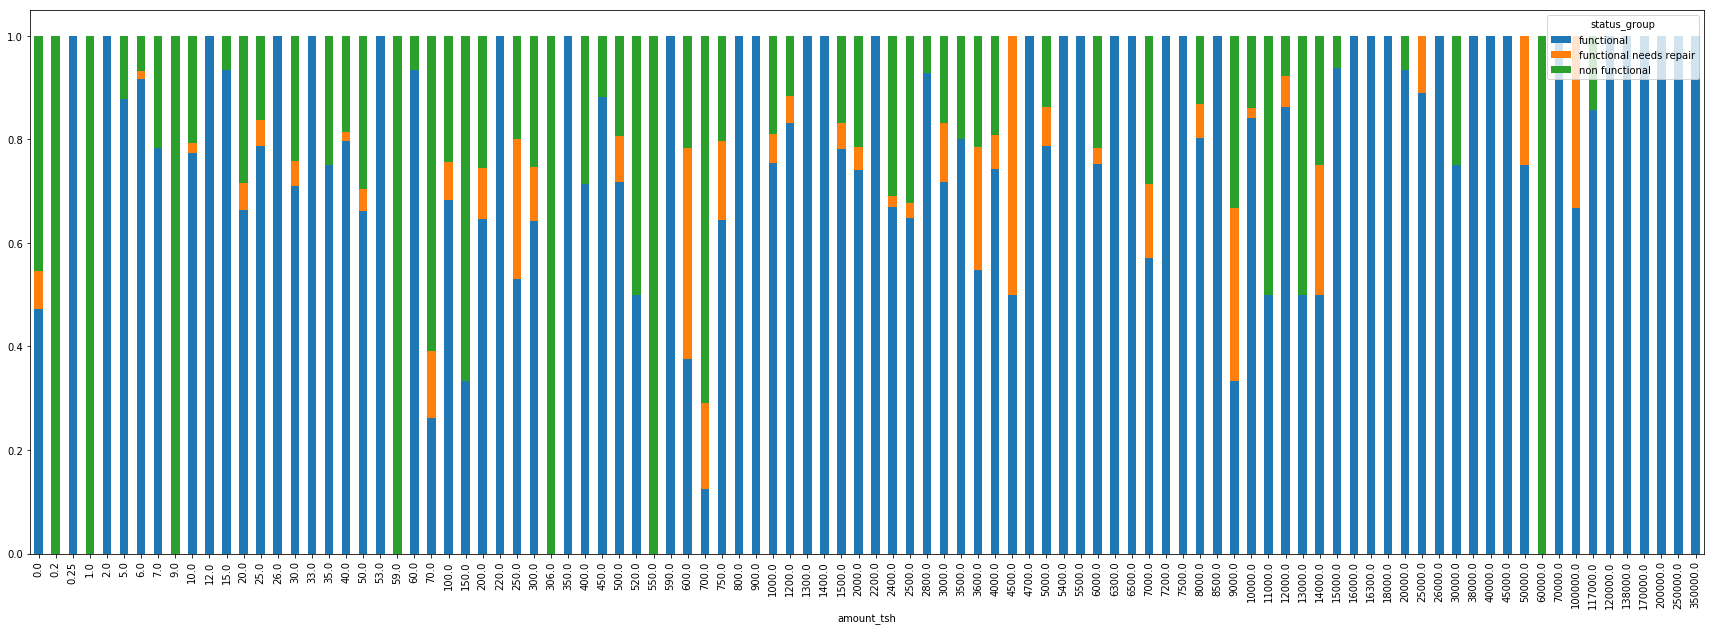

In [28]:
#Plot to compare amount of water in pump with there functionality
pd.crosstab(data_values.amount_tsh,
            data_labels.status_group, normalize="index").plot.bar(stacked=True, figsize=(30,10));

In [29]:
#use command --> "pip install --user geocoder" to install Geocoder package
import geocoder

#[Rounding] : latitude, longitude values up to 6 decimal places
for location in ["latitude","longitude"]:
    data_values[location] = data_values[location].map(lambda x: round(x, 6))
    data_values[location] = data_values[location].replace(to_replace=-0.0, value=0)
    
# Get missing latitude and longitude values and fill it using 
# geocoder.google("Place name") which returns latitude and longitude which is what we want 
for lga in data_values[(data_values.latitude == 0) | (data_values.longitude == 0)]["lga"].unique():
    g = geocoder.google(lga)
    data_values.loc[data_values.lga == lga, "latitude"] = g.latlng[0]
    data_values.loc[data_values.lga == lga, "longitude"] = g.latlng[1]
    
# Get missing gps_height values from the heights.csv file generated using geocoder.elevation([lat,long])
#[Alternate]: Take mean of heights to fill the missing values 
heights = pd.Series(heights.gps_height.values, index=heights.id).to_dict()
for key in heights.keys():
    data_values.loc[data_values.id == key, "gps_height"] = heights[key]

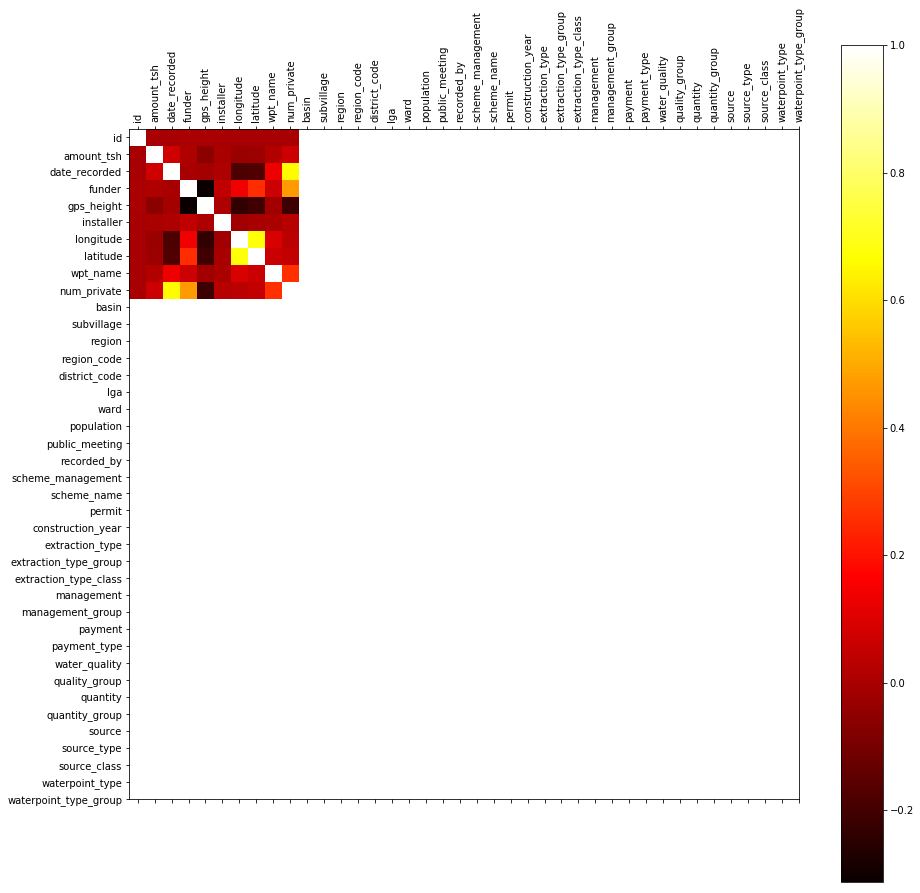

In [30]:
#Co-relation plot for checking how each feature is related to other features in the data 
import matplotlib.pyplot as plot
plot.figure(figsize=(15,15))
plot.matshow(data_values.corr(), fignum=1, cmap = 'hot')
plot.xticks(rotation=90)
plot.xticks(range(len(data_values.columns)), data_values.columns)
plot.yticks(range(len(data_values.columns)), data_values.columns)
plot.colorbar()
plot.show()

In [31]:
data_values

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,1671,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,6,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,1140,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,1254,DWE,32.620617,-4.226198,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,1154,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,1354,Artisan,30.626991,-1.257051,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [32]:
#dropping few columns which are not helpful in prediction of functionality of pumps based on co-relation plot
dropCol = ["funder","installer","num_private","public_meeting","extraction_type_group",
        "management_group","quantity_group","recorded_by",
        "ward","wpt_name"]
data_values.drop(dropCol, axis=1, inplace=True)
#Rounding and taking log of the values to take in to count of very small values and make distribution normal
from math import log
data_values["amount_tsh"] = data_values["amount_tsh"].apply(lambda x: log(round(x)) if round(x) > 0 else 0)
data_values["population"] = data_values["population"].apply(lambda x: log(x) if x > 0 else 0)
data_values["district_code"] = data_values["district_code"].map(lambda x: str(x))
data_values["region_code"] = data_values["region_code"].map(lambda x: str(x))

#Normalizing few columns in range[0,1] using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
normalizeCol = ['gps_height',
             "amount_tsh",
             "population",
             "latitude",
             "longitude"]
scaler = MinMaxScaler(feature_range=(0, 1))
for n in normalizeCol:
    rescaledX = scaler.fit_transform(data_values[[n]])
    data_values[n] = rescaledX

In [34]:
#Encoding categorical values to numerical
from sklearn.preprocessing import LabelEncoder
encodeCattoNumLabels = ['basin',
          'construction_year',
          'district_code',
          'extraction_type',
          'extraction_type_class',
          'lga',
          'management',
          'payment',
          'payment_type',
          'permit',
          'quality_group',
          'quantity',
          'region',
          'region_code',
          'scheme_management',
          'scheme_name',
          'source',
          'source_class',
          'source_type',
          'subvillage',
          'water_quality',
          'waterpoint_type',
          'waterpoint_type_group']
X_p = data_values
lb_make = LabelEncoder()
for column in encodeCattoNumLabels:
    if data_values[column].dtype not in ['int64', 'float64']:
        data_values[column] = data_values[column].astype('category')
        data_values[column] = lb_make.fit_transform(data_values[column].fillna(method='ffill'))     


In [35]:
conc = [c for c in list(data_values) if c not in encodeCattoNumLabels]
data_values = pd.concat([data_values[conc], data_values[encodeCattoNumLabels]], axis = 1)

# Merge train labels
data_values = pd.merge(data_values, data_labels, on="id")
data_values.shape

(59400, 31)

In [36]:
# As seen from co-relation plot both date_recorded and construction year seems to contribute similarly,
#But we don't want to loss any info so, we will replace 'date_recorded' with 'date_recorded - construction_year' and drop construction_year
data_values['date_recorded'].replace('', np.nan, inplace=True)
data_values.dropna(subset=['date_recorded'], inplace=True)
data_values['date_recorded'] = pd.to_datetime(data_values['date_recorded']).dt.year
data_values['date_recorded'] = data_values['date_recorded'].astype('int32')
data_values['construction_year'] = data_values['construction_year'].astype('int32')
data_values['construction_year'] = data_values['construction_year'].replace(0,np.nan)
data_values = data_values.dropna(subset=['construction_year'])
data_values['date_recorded'] = data_values['date_recorded']- data_values['construction_year']
data_values.drop(['construction_year'],axis=1,inplace=True)
data_values.shape

(38691, 30)

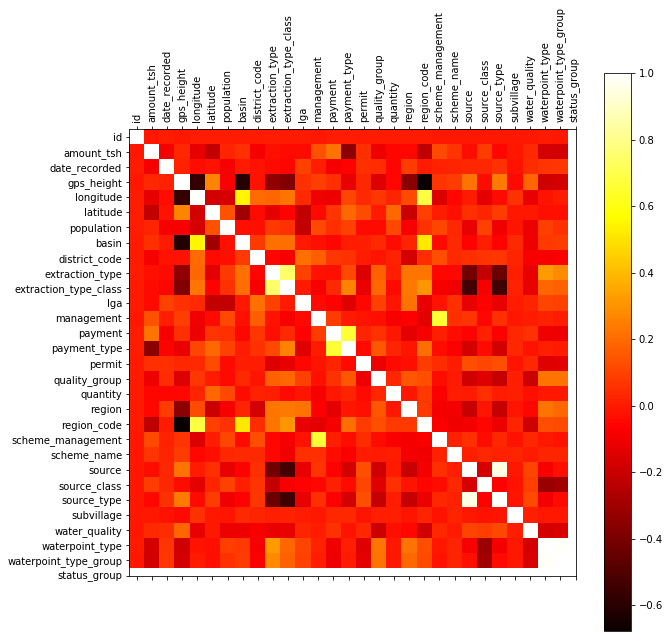

In [37]:
#Now again do Co-relation plot on train dataset for checking how each feature is related to other features in the data 
import matplotlib.pyplot as plot
plot.figure(figsize=(10,10))
plot.matshow(data_values.corr(), fignum=1, cmap = 'hot')
plot.xticks(rotation=90)
plot.xticks(range(len(data_values.columns)), data_values.columns)
plot.yticks(range(len(data_values.columns)), data_values.columns)
plot.colorbar()
plot.show()

In [38]:
#dropping few columns from both train and test dataset which are not helpful in prediction of functionality of pumps 
#based on co-relation plot
dropCol = ["extraction_type_class","payment_type","source_type","waterpoint_type_group"]
data_values.drop(dropCol, axis=1, inplace=True)
data_values.to_csv("../../../Datasets/train_values_processed.csv", index = False)